# Harris Corner Detector

This has the advantage of being more accurate than the FAST detector but with comparable speed although not as fast. 

## How it works

The detector extracts x and y gradients at every pixel ($G_x^2 and G_y^2$). If both $G_x^2 and G_y^2$ are large and comparable then there exists a corner. More formally, the gradient magnitude of the image is defined as 

$$M = \begin{bmatrix}\sum G_x^2 & \sum G_xy\\ \sum G_xy & \sum G_y^2 \end{bmatrix}$$

With this constructed, we can get the cornerness of a pixel by 

$ R = det(M) - k(trace(M))^2 $

The determinant is define as $\lambda_1*\lambda_2$ and trace is $\lambda_1+\lambda_2$ . Here $\lambda_1 and \lambda_2$ are the eigenvalues of the $M$ matrix

A pixel is considered to have a corner if R is possitive and large

<img src="image/harris_eigenvalues.jpg" width=300/>

1850


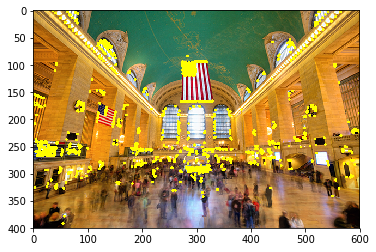

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('image/grand_central_terminal.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

blockSize = 2
apetureSize = 3
k = 0.1 # multiplier for the trace component
T = 0.02 # Threshold 

H = cv2.cornerHarris(gray, blockSize, apetureSize, k)

kps = np.argwhere(H > T * H.max())
kps = [cv2.KeyPoint(pt[1], pt[0], 3) for pt in kps]

print(len(kps))
for kp in kps:
    r = int(0.5 * kp.size)
    (x, y) = np.int0(kp.pt)
    cv2.circle(image, (x, y), r, (0, 255, 255), 2)
    
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

# GFFT Detector

Similar to Harris, this detector uses the gradient magnitudes but uses the minumum of the two eigen values to define the cornerness

$ R = min(\lambda_1,\lambda_2) $

The pixel is believed to have a corner if both $\lambda_1 and \lambda_2 > T $  the defined threshold

4361


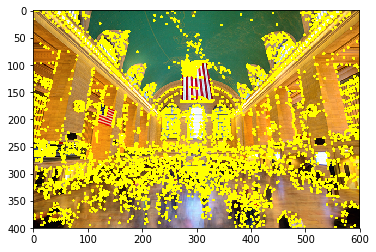

In [5]:
def gftt(gray, maxCorners=0, qualityLevel=0.01, minDistance=1,
	mask=None, blockSize=3, useHarrisDetector=False, k=0.04):
	# compute GFTT keypoints using the supplied parameters (OpenCV 3 only)
	kps = cv2.goodFeaturesToTrack(gray, maxCorners, qualityLevel,
		minDistance, mask=mask, blockSize=blockSize,
		useHarrisDetector=useHarrisDetector, k=k)
 
	# create and return `KeyPoint` objects
	return [cv2.KeyPoint(pt[0][0], pt[0][1], 3) for pt in kps]

kps = gftt(gray)

print(len(kps))
for kp in kps:
    r = int(0.5 * kp.size)
    (x, y) = np.int0(kp.pt)
    cv2.circle(image, (x, y), r, (0, 255, 255), 2)
    
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

# DoG keypoint detector 

Creates several stacks(octaves) of progressively blurred images and subtracts each blurred image with the next in the octave. It then compares each pixel with 8 of its neighbors in each layer and the layers above and below and marks it as a keypoint if the pixel is either a maxima or a minima of all the pixels compared. 

This is not fast enough to use in real time applications

Note: SIFT is the image descriptor and DoG is the keypoint descriptor

2567


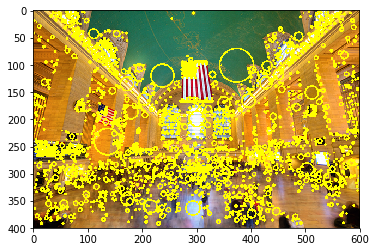

In [9]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
detector = cv2.xfeatures2d.SIFT_create()
(kps, _) = detector.detectAndCompute(gray, None)

print(len(kps))
for kp in kps:
    r = int(0.5 * kp.size)
    (x, y) = np.int0(kp.pt)
    cv2.circle(image, (x, y), r, (0, 255, 255), 2)
    
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

# Fast Hessien 

This was developed to overcome the draw back of DoG descriptor that it was slow in execution because of the fact that it was taking a difference between consecutive blurred images in an octave. Instead in this case, the Difference of Gaussians is approximated by utilizing Haar wavelets and integral images.

The image is convolved with box filters and the Difference in the Gaussian is approximated.

Note: SURF is the image descriptor and Fast Hessien is the keypoint descriptor

2485


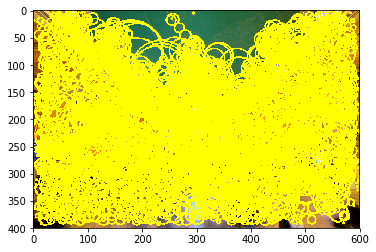

In [11]:
detector = cv2.xfeatures2d.SURF_create()
(kps, _) = detector.detectAndCompute(gray, None)

print(len(kps))
for kp in kps:
    r = int(0.5 * kp.size)
    (x, y) = np.int0(kp.pt)
    cv2.circle(image, (x, y), r, (0, 255, 255), 2)
    
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()